In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ventas_clientes.csv')

df.head()

,Cliente_ID,Nombre,Categoría,Cantidad,Precio,Método de Pago,Fecha
0,1001,Cliente_1,Electrónica,2,45.50,PayPal,2024-01-01
1,1002,Cliente_2,Moda,1,30.00,Tarjeta de Crédito,2024-01-02
2,1003,Cliente_3,Hogar,3,25.75,Efectivo,2024-01-03
3,1004,Cliente_4,Deportes,4,50.00,Tarjeta de Crédito,2024-01-04
4,1005,Cliente_5,NaN,2,40.00,PayPal,2024-01-05


In [28]:
print('Los valores perdidos son\n', df.isnull().sum())

# Borrar filas con NaN
df.dropna(inplace=True)

# Verificar
print('Los valores perdidos son\n',df.isnull().sum())

Los valores perdidos son
 Cliente_ID        0
Nombre            0
Categoría         2
Cantidad          0
Precio            1
Método de Pago    0
Fecha             0
dtype: int64
Los valores perdidos son
 Cliente_ID        0
Nombre            0
Categoría         0
Cantidad          0
Precio            0
Método de Pago    0
Fecha             0
dtype: int64


In [29]:
# Identificar registros duplicados
duplicados = df[df.duplicated()]

print('Registros duplicados encontrados:\n', duplicados)

# Eliminar registros duplicados
df_sin_duplicados = df.drop_duplicates()

print('DataFrame después de eliminar duplicados:\n', df_sin_duplicados)

Registros duplicados encontrados:
     Cliente_ID     Nombre    Categoría  Cantidad  Precio      Método de Pago  \
12        1007  Cliente_7  Electrónica        50    90.0  Tarjeta de Crédito   

         Fecha  
12  2024-01-07  
DataFrame después de eliminar duplicados:
    Cliente_ID      Nombre    Categoría  Cantidad  Precio      Método de Pago  \
0        1001   Cliente_1  Electrónica         2   45.50              PayPal   
1        1002   Cliente_2         Moda         1   30.00  Tarjeta de Crédito   
2        1003   Cliente_3        Hogar         3   25.75            Efectivo   
3        1004   Cliente_4     Deportes         4   50.00  Tarjeta de Crédito   
5        1006   Cliente_6  Electrónica         6   75.25            Efectivo   
6        1007   Cliente_7  Electrónica        50   90.00  Tarjeta de Crédito   
7        1008   Cliente_8     Deportes        60   85.00            Efectivo   
8        1009   Cliente_9         Moda         5   32.50              PayPal   
9      

<Axes: >

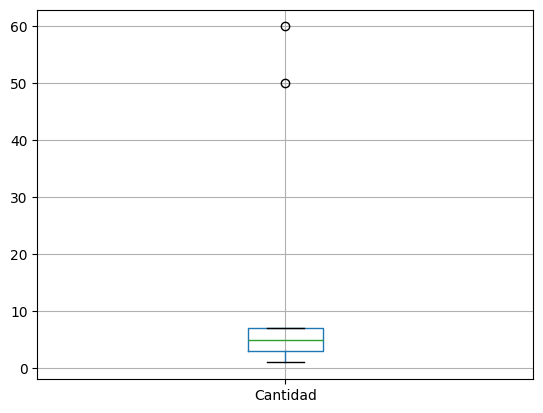

In [30]:
df_sin_duplicados.boxplot(column='Cantidad')

In [31]:
Q1 = df_sin_duplicados['Cantidad'].quantile(0.25)
Q3 = df_sin_duplicados['Cantidad'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sin_duplicados['Cantidad'] = np.where(df_sin_duplicados['Cantidad'] > upper_bound, df_sin_duplicados['Cantidad']/10, df_sin_duplicados['Cantidad'])


df_sin_outliers = df_sin_duplicados[(df_sin_duplicados['Cantidad'] >= lower_bound) & (df_sin_duplicados['Cantidad'] <= upper_bound)]

/tmp/ipython-input-31-69407345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados['Cantidad'] = np.where(df_sin_duplicados['Cantidad'] > upper_bound, df_sin_duplicados['Cantidad']/10, df_sin_duplicados['Cantidad'])


<Axes: >

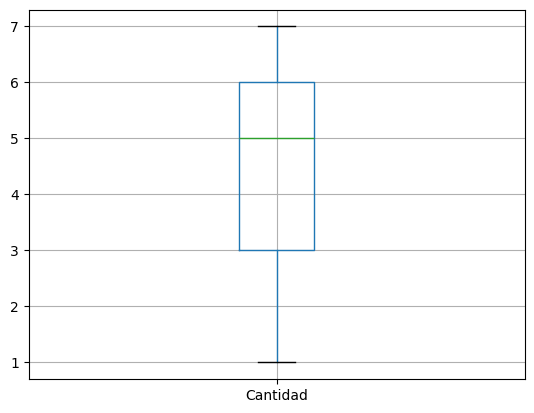

In [32]:
df_sin_duplicados.boxplot(column='Cantidad')

<Axes: >

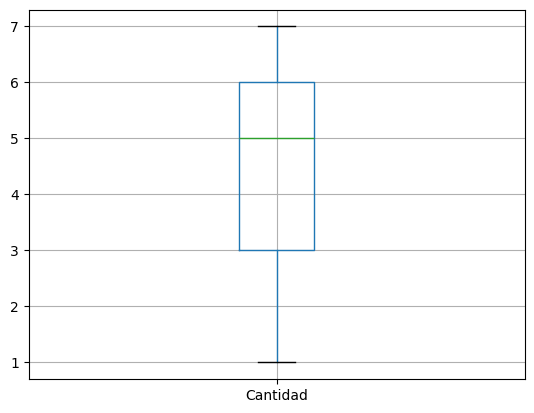

In [33]:
df_sin_outliers.boxplot(column='Cantidad')